In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_valid',X_valid.shape)
print('Y_train',Y_train.shape)
print('Y_test',Y_test.shape)
print('Y_valid',Y_valid.shape)

X_train (11610, 8)
X_test (5160, 8)
X_valid (3870, 8)
Y_train (11610,)
Y_test (5160,)
Y_valid (3870,)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [6]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [8]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    validation_data=(X_valid,Y_valid))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 0.8521 - root_mean_squared_error: 0.9231 - mean_absolute_percentage_error: 37.0319 - val_loss: 0.6185 - val_root_mean_squared_error: 0.7865 - val_mean_absolute_percentage_error: 32.6165
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8573 - root_mean_squared_error: 0.9259 - mean_absolute_percentage_error: 32.9173 - val_loss: 0.5231 - val_root_mean_squared_error: 0.7233 - val_mean_absolute_percentage_error: 31.8535
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4848 - root_mean_squared_error: 0.6963 - mean_absolute_percentage_error: 28.3337 - val_loss: 0.4873 - val_root_mean_squared_error: 0.6981 - val_mean_absolute_percentage_error: 27.4150
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4502 - root_mean_squared_error: 0.6710 - mean_absolute_percentage_error: 26.9664 - val_loss: 0.4676 - val_root_mean_squared_error: 0.6838 - val_

<Axes: >

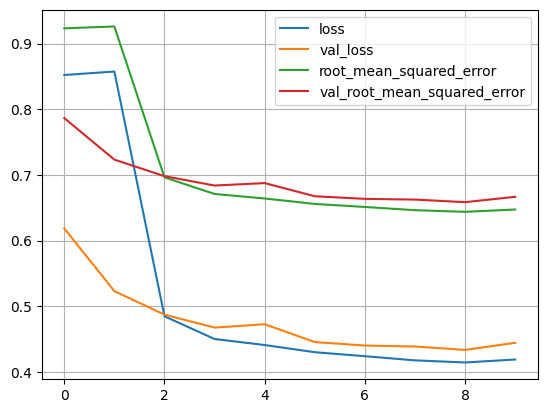

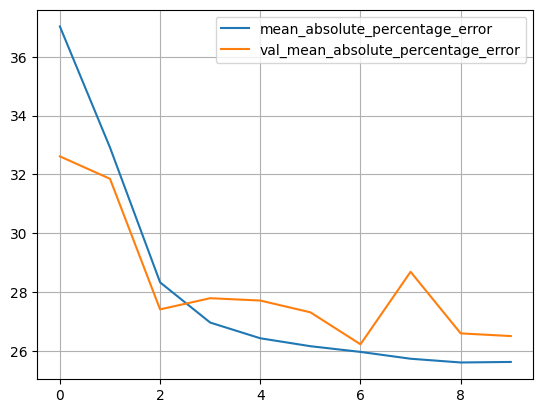

In [12]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss', 'root_mean_squared_error','val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(grid=True)

In [15]:
loss, RMSE, MAPE = model.evaluate(X_train, Y_train)
print('Loss train',loss)
print('root_mean_squared_error train',RMSE)
print('mean_absolute_percentage_error train',MAPE)

loss, RMSE, MAPE = model.evaluate(X_valid, Y_valid)
print('Loss valid',loss)
print('root_mean_squared_error valid',RMSE)
print('mean_absolute_percentage_error valid',MAPE)

loss, RMSE, MAPE = model.evaluate(X_test, Y_test)
print('Loss test',loss)
print('root_mean_squared_error test',RMSE)
print('mean_absolute_percentage_error test',MAPE)


363/363 [==============================] - 1s 2ms/step - loss: 0.4290 - root_mean_squared_error: 0.6550 - mean_absolute_percentage_error: 25.6152
Loss train 0.4289897382259369
root_mean_squared_error train 0.6549730896949768
mean_absolute_percentage_error train 25.61524772644043
121/121 [==============================] - 0s 2ms/step - loss: 0.4445 - root_mean_squared_error: 0.6667 - mean_absolute_percentage_error: 26.5078
Loss valid 0.44445568323135376
root_mean_squared_error valid 0.6666750907897949
mean_absolute_percentage_error valid 26.507802963256836
162/162 [==============================] - 0s 2ms/step - loss: 0.4237 - root_mean_squared_error: 0.6509 - mean_absolute_percentage_error: 25.6029
Loss test 0.4236760437488556
root_mean_squared_error test 0.6509039998054504
mean_absolute_percentage_error test 25.602895736694336
